# Prayas Jadaun 
# 2301560025 
# AI & Machine Learning
# MCA-sec-A

****************************************************************

# New York Stock Exchange

## 🗂️ Project Overview

The project involves analyzing financial datasets to understand the performance and financial health of various companies. Key financial metrics are provided, offering insights into liquidity, profitability, and operational efficiency.

## 📝 Summary

This dataset provides a comprehensive view of a company's financial health, encompassing various aspects such as liquidity, profitability, and investment activities. Analysts and investors can leverage this dataset to make informed decisions regarding stock investments, strategic partnerships, and overall financial assessments.

## 📄 Description

The dataset covers a wide range of financial indicators, allowing users to perform in-depth analyses of companies' financial positions and performance. It is a valuable resource for financial analysts, researchers, and investors aiming to understand and compare the financial standing of different companies.


# 📊 Data Set Information

The dataset includes financial information for various companies, represented by the following columns:

1. **Ticker Symbol:** The unique stock symbol of the company.
2. **Period Ending:** The end date of the financial reporting period.
3. **Accounts Payable:** Amount the company owes to suppliers.
4. **Accounts Receivable:** Amount owed to the company by customers.
5. **Add'l Income/Expense Items:** Additional income or expenses not part of regular operations.
6. **After Tax ROE (Return on Equity):** Net income as a percentage of sharehold.nancials)].
7. **Capital Expenditures:** Spending on long-term assets.
8. **Capital Surplus:** Surplus from issuing stock beyond its par value.
9. **Cash Ratio:** Company's ability to cover short-term liabilities with cash a.ial-ratios/)].
10. **Cash and Cash Equivalents:** Cash on hand and short-term investments.
11. **Changes in Inventories:** Value change in stored goods.
12. **Common Stocks:** Value of common stock issued by the company.
13. **Cost of Revenue:** Cost associated with pservices.nting/financial-ratios/)
</response>

## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')
%matplotlib Inline
from sklearn.impute import SimpleImputer

## 2. Read Data

In [2]:
df = pd.read_csv("E:\My Environment\MCA Notes\Assignments\AI & ML Assignments\Assignment(Projects)\stock exchange.csv")
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


## Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

## Describe Data

In [4]:
df.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


# 3. Simple Linear Regression for 'Net Income' and 'Total Revenue' to analyze the relationship between these variables

### 3.1.Prepare the data:

In [5]:
X = df[['Total Revenue']]  # Independent variable
y = df['Net Income']       # Dependent variable

### 3.2. Split the data into training and testing sets:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.3. Create and train the Linear Regression model:

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 3.4. Make predictions on the test set:

In [8]:
y_pred = model.predict(X_test)

### 3.5. Evaluate the model performance:

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1317589531.768645
Mean Squared Error: 9.54495551444767e+18
Root Mean Squared Error: 3089491141.668425


### 3.6. Visualize the regression line:

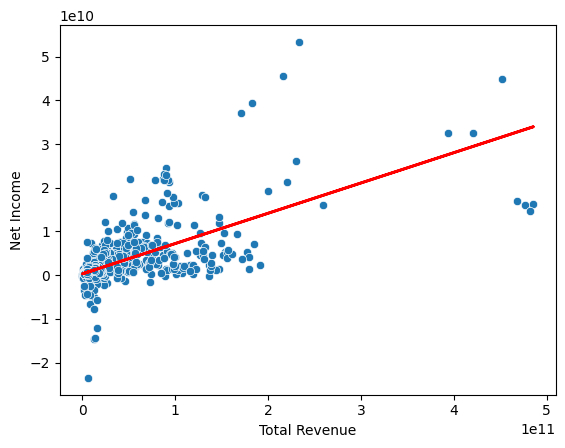

In [10]:
sns.scatterplot(x='Total Revenue', y='Net Income', data=df)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# 4. Multiple Linear Regression including 'Cash Ratio', 'Gross Margin', and 'Short-Term Investments' as predictors for 'Net Income'.

### 4.1. Prepare the data

In [11]:
X = df[['Gross Margin', 'Short-Term Investments']]  # Independent variables
y = df['Net Income']  # Dependent variable

### 4.2. Split the data into training and testing sets:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4.3. Create and train the Multiple Linear Regression model:

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4.4. Make predictions on the test set:

In [14]:
y_pred = model.predict(X_test)

### 4.5. Evaluate the model performance:

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1676664301.8695574
Mean Squared Error: 1.2738023318006219e+19
Root Mean Squared Error: 3569036749.321337


### 4.6. Visualize the predicted values against the actual values:

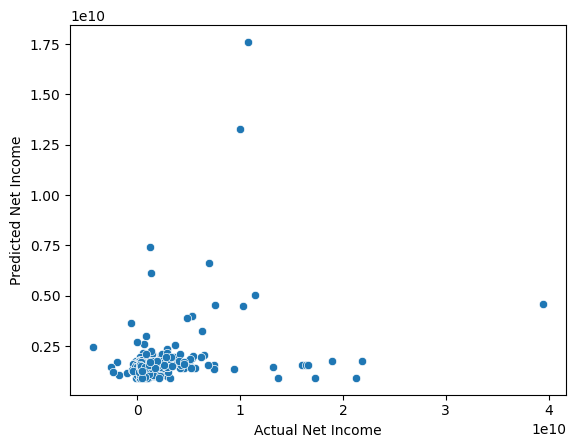

In [16]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Net Income')
plt.ylabel('Predicted Net Income')
plt.show()

# 5. Investigate the impact of 'Research and Development' expenses on 'Earnings Before Tax' using Linear Regression.

### 5.1. Prepare the data:

In [17]:
X = df[['Research and Development']]  # Independent variable
y = df['Earnings Before Tax']         # Dependent variable

### 5.2. Split the data into training and testing sets:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 5.3. Create and train the Linear Regression model:

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 5.4. Make predictions on the test set:

In [20]:
y_pred = model.predict(X_test)

### 5.5. Evaluate the model performance:

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2326820312.8017344
Mean Squared Error: 2.3720713635557704e+19
Root Mean Squared Error: 4870391527.953138


### 5.6. Visualize the regression line:

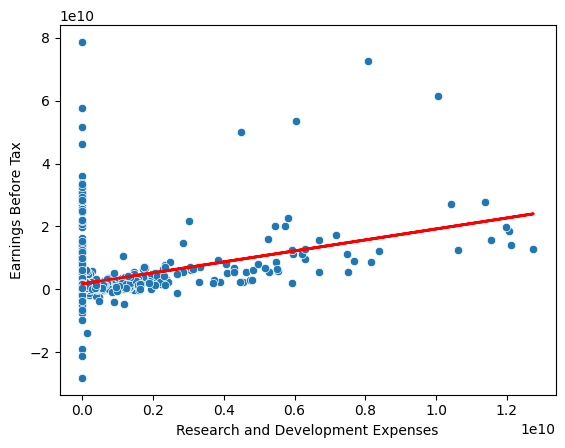

In [22]:
sns.scatterplot(x='Research and Development', y='Earnings Before Tax', data=df)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Research and Development Expenses')
plt.ylabel('Earnings Before Tax')
plt.show()

# 6. Simple Linear Regression for 'Quick Ratio' and 'Net Income' to understand their association.

### 6.1. Prepare the data:

In [23]:
X = df[['Quick Ratio']]  # Independent variable
y = df['Net Income']      # Dependent variable

### 6.2.Split the data into training and testing sets:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 6.3. Impute NaN values using scikit-learn's SimpleImputer:

In [25]:
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)

### 6.4.Alternatively, remove rows with NaN values:

In [26]:
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train.index]

### 6.5. Evaluate the model performance:

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1987360438.384795
Mean Squared Error: 1.2087288330484294e+19
Root Mean Squared Error: 3476677772.0237885


### 6.6.Visualize the relationship between 'Quick Ratio' and 'Net Income'

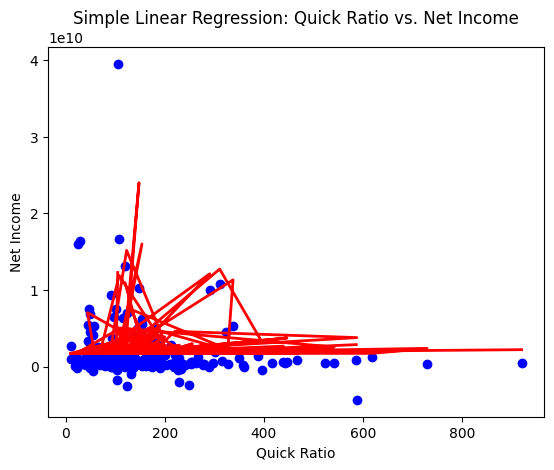

In [28]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Quick Ratio')
plt.ylabel('Net Income')
plt.title('Simple Linear Regression: Quick Ratio vs. Net Income')
plt.show()

## 7. Multiple Regression with 'Gross Profit', 'Total Equity', and 'Short-Term Debt' as predictors for 'Net Cash Flow'.

### 7.1. Prepare the data:

In [29]:
X = df[['Gross Profit', 'Total Equity']]  # Independent variables
y = df['Net Cash Flow']                                     # Dependent variable

### 7.2.Split the data into training and testing sets:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 7.3. Create and train the Multiple Regression model:

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 7.4. Make predictions on the test sets:

In [32]:
y_pred = model.predict(X_test)

### 7.5. Evaluate the model performance:

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 742922792.3947706
Mean Squared Error: 3.352253332912353e+18
Root Mean Squared Error: 1830915981.9370065


### 7.6. Visualize the predicted values against the actual values:

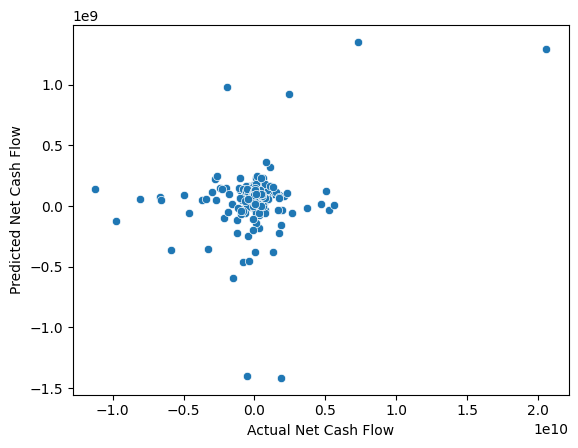

In [34]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Net Cash Flow')
plt.ylabel('Predicted Net Cash Flow')
plt.show()

# 8. Explore the correlation between 'Accounts Receivable' and 'Net Receivables' using Linear Regression.

### 8.1. Preparethe data:

In [35]:
X = df[['Accounts Receivable']]  # Independent variable
y = df['Net Receivables']         # Dependent variable

### 8.2. Split the data into training and testing sets:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 8.3. Create and train the Linear Regression model:

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 8.4. Make predictions on the test set:

In [38]:
y_pred = model.predict(X_test)

### 8.5. Evaluate the model performance:

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4326113449.082728
Mean Squared Error: 9.779708313140183e+19
Root Mean Squared Error: 9889240776.288229


### 8.6. Visualize the relationship between 'Accounts Receivable' and 'Net Receivables':

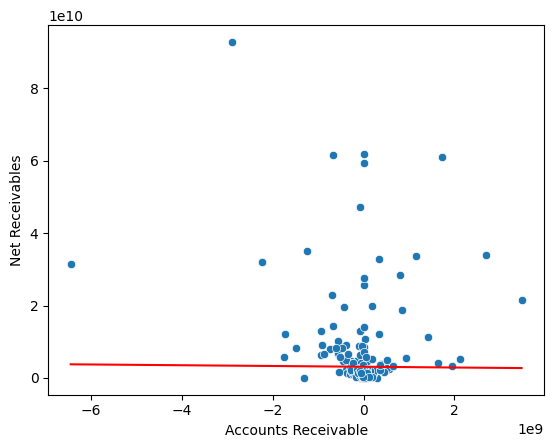

In [40]:
sns.scatterplot(x=X_test['Accounts Receivable'], y=y_test)
sns.lineplot(x=X_test['Accounts Receivable'], y=y_pred, color='red')
plt.xlabel('Accounts Receivable')
plt.ylabel('Net Receivables')
plt.show()

## 9. Investigate the impact of 'Common Stocks' on 'Total Revenue' using Linear Regression.

### 9.1. Prepare the data:

In [41]:
X = df[['Common Stocks']]    # Independent variable
y = df['Total Revenue']       # Dependent variable

### 9.2  Split the data into training and testing sets:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 9.3. Create and train the Linear Regression model:

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 9.4.Make predictions on the test set:

In [44]:
y_pred = model.predict(X_test)

### 9.5 Evaluate the model performance:

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19985395787.417767
Mean Squared Error: 1.9076119554553566e+21
Root Mean Squared Error: 43676217275.02688


### 9.6. Visualize the relationship between 'Common Stocks' and 'Total Revenue':

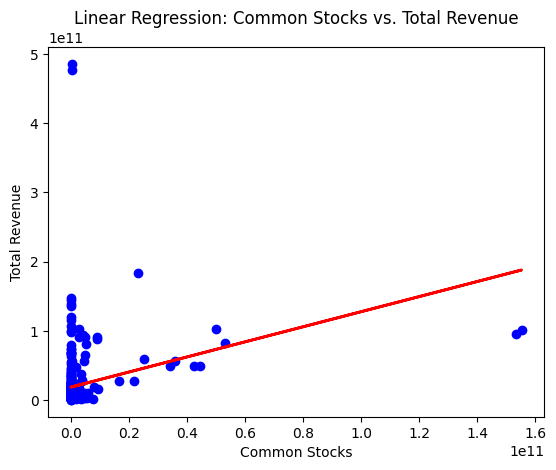

In [46]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Common Stocks')
plt.ylabel('Total Revenue')
plt.title('Linear Regression: Common Stocks vs. Total Revenue')
plt.show()

## 10. Multiple Regression with 'Operating Margin', 'Earnings Before Interest and Tax', and 'Total Liabilities' as predictors for 'Net Income'.



### 10.1. Prepare the data:

In [47]:
X = df[['Operating Margin', 'Earnings Before Interest and Tax', 'Total Liabilities']]    # Independent variables
y = df['Net Income']       # Dependent variable

## 10. 2. Split the data into training and testing sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 10.3. Create and train the Multiple Regression model

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 10.4. Make predictions on the test set

In [50]:
y_pred = model.predict(X_test)

### 10.5. Evaluate the model performance

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 327343473.2507764
Mean Squared Error: 4.641433817444973e+17
Root Mean Squared Error: 681280692.332094


### 10.6.Display the coefficients and intercept

In [52]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-3.41180976e+06  6.68023064e-01 -2.62579239e-03]
Intercept: 76761859.67921138


### 10.7. Visualize the relationship between predictors and 'Net Income'

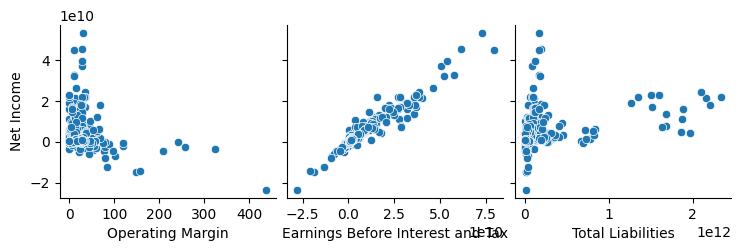

In [53]:
sns.pairplot(df, x_vars=['Operating Margin', 'Earnings Before Interest and Tax', 'Total Liabilities'], y_vars='Net Income', kind='scatter')
plt.show()

## 11. Analyze the relationship between 'Total Current Assets' and 'Total Current Liabilities' using Simple Linear Regression.

### 11.a. Prepare the data

In [54]:
X = df[['Total Current Assets']]    # Independent variable
y = df['Total Current Liabilities']   # Dependent variable

### 11.b.Split the data into training and testing sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 11.c. Create and train the Simple Linear Regression model

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 11.d. Make predictions on the test set

In [57]:
y_pred = model.predict(X_test)

### 11.e.Evaluate the model performance


In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1926348307.0481627
Mean Squared Error: 2.5391947571084603e+19
Root Mean Squared Error: 5039042326.780417


### 11.f.Display the regression line


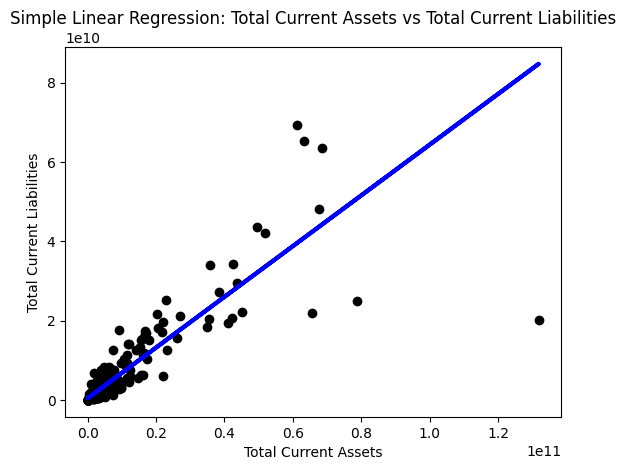

In [59]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Total Current Assets')
plt.ylabel('Total Current Liabilities')
plt.title('Simple Linear Regression: Total Current Assets vs Total Current Liabilities')
plt.show()

## 12. Multiple Regression including 'After Tax ROE', 'Total Assets', and 'Gross Profit' as predictors for 'Net Cash Flows-Financing'.

### 12.a. Prepare the data

In [60]:
X = df[['After Tax ROE', 'Total Assets', 'Gross Profit']]   # Independent variables
y = df['Net Cash Flows-Financing']   # Dependent variable

### 12.b.Split the data into training and testing sets


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 12.c. Create and train the Multiple Regression model


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 12.d. Make predictions on the test set

In [63]:
y_pred = model.predict(X_test)

### 12.e.  Evaluate the model performance

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2775226242.095219
Mean Squared Error: 1.1628546429406623e+20
Root Mean Squared Error: 10783573818.269444


### 12.f. Display the regression coefficients


In [65]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Regression Coefficients:\n', coefficients)

Regression Coefficients:
                  Coefficient
After Tax ROE -162918.073495
Total Assets        0.013642
Gross Profit       -0.244940


### 12.g. Display the regression equation

In [66]:
equation = f'Net Cash Flows-Financing = {model.intercept_} + ' + ' + '.join([f'{model.coef_[i]} * {X.columns[i]}' for i in range(len(X.columns))])
print('\nRegression Equation:\n', equation)


Regression Equation:
 Net Cash Flows-Financing = 598437974.1444063 + -162918.0734950938 * After Tax ROE + 0.013642053972906382 * Total Assets + -0.2449400519848929 * Gross Profit


## 13. Multiple Regression with 'Total Revenue', 'Sale and Purchase of Stock', and 'Misc. Stocks' as predictors for 'Net Cash Flow-Operating'.

### 13.a.Prepare the data

In [67]:
X = df[['Total Revenue', 'Sale and Purchase of Stock', 'Misc. Stocks']]   # Independent variables
y = df['Net Cash Flow-Operating']   # Dependent variable

### 13.b.Split the data into training and testing sets

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 13.c.Create and train the Multiple Regression model

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 13.d.Make predictions on the test set

In [70]:
y_pred = model.predict(X_test)


### 13.e. Evaluate the model performance

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2450812219.267869
Mean Squared Error: 5.3589162539687715e+19
Root Mean Squared Error: 7320461907.536143


### 13.e. Display the regression coefficient

In [72]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Regression Coefficients:\n', coefficients)

Regression Coefficients:
                             Coefficient
Total Revenue                  0.090428
Sale and Purchase of Stock    -0.765485
Misc. Stocks                  -1.394156


### 13.f. Display the intercept

In [73]:
print('\nIntercept:', model.intercept_)


Intercept: 779164850.3156118


### 13.g. Visualize the relationship with a scatter plot

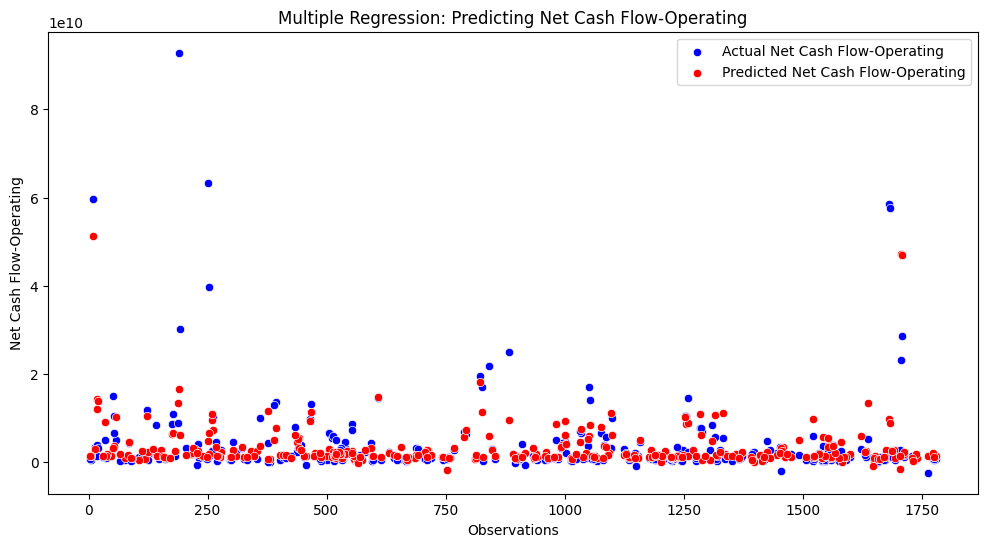

In [74]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test.index, y=y_test, color='blue', label='Actual Net Cash Flow-Operating')
sns.scatterplot(x=y_test.index, y=y_pred, color='red', label='Predicted Net Cash Flow-Operating')
plt.title('Multiple Regression: Predicting Net Cash Flow-Operating')
plt.xlabel('Observations')
plt.ylabel('Net Cash Flow-Operating')
plt.legend()
plt.show()

## 14. Analyze the relationship between 'Depreciation' and 'Total Liabilities & Equity' using Simple Linear Regression.

### 14. 1. Prepare the data

In [75]:
X = df[['Depreciation']]   # Independent variable
y = df['Total Liabilities & Equity']   # Dependent variable

### 14.2. Split the data into training and testing sets

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 14.3. Create and train the Simple Linear Regression model

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 14.4.  Make predictions on the test set

In [78]:
y_pred = model.predict(X_test)

### 14.5. Evaluate the model performance

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 72667978573.5012
Mean Squared Error: 7.066198165737086e+22
Root Mean Squared Error: 265823215045.9603


### 14.6. Display the regression coefficients

In [80]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Regression Coefficients:\n', coefficients)

Regression Coefficients:
               Coefficient
Depreciation    22.819319


### 14.7. Display the intercept

In [81]:
print('\nIntercept:', model.intercept_)


Intercept: 24170405002.05197


### 14.8. Visualize the relationship with a scatter plot and regression line

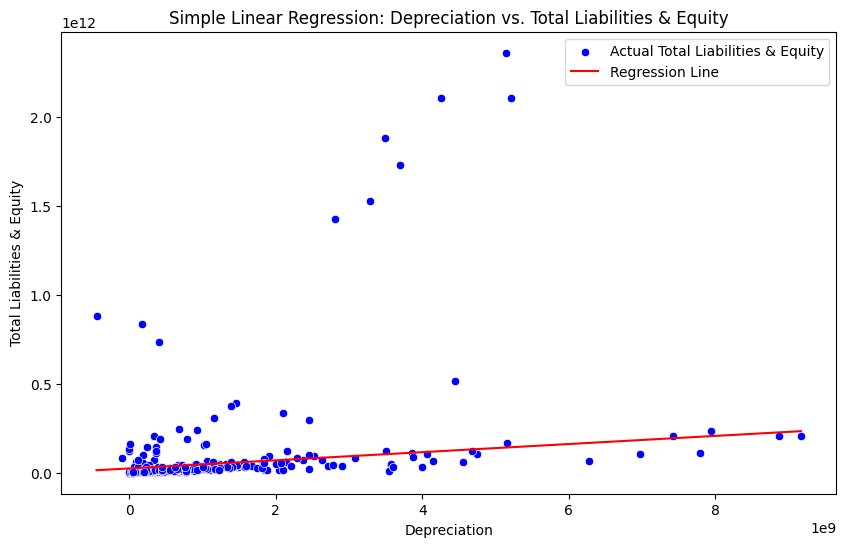

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Depreciation'], y=y_test, color='blue', label='Actual Total Liabilities & Equity')
sns.lineplot(x=X_test['Depreciation'], y=y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Depreciation vs. Total Liabilities & Equity')
plt.xlabel('Depreciation')
plt.ylabel('Total Liabilities & Equity')
plt.legend()
plt.show()


# 📝 Conclusion

1. **Ticker Symbol:** Identifies unique stock symbols..
2. **Period Ending:** Specifies the end date of financial reporting.
3. **Accounts Payable:** Reveals company debts to suppliers.
4. **Accounts Receivable:** Indicates amounts owed by customers.
5. **Add'l Income/Expense Items:** Highlights non-operational income or expenses.
6.  **After Tax ROE (Return on Equity)** Measures profitability relative to equity.
7.  **Capital Expenditures:** Reflects spending on long-term assets.
8. **Capital Surplus:** Shows surplus from stock issuance beyond par value.
9. **Cash Ratio:** Indicates short-term liquidity.
10. **Cash and Cash Equivalents:** Represents liquid assets.
11. **Changes in Inventories:** Demonstrates value changes in stored goods.
12. **Common Stocks:** Indicates the value of issued common stock.
13. **Cost of Revenue:** Shows the cost of producing goods or services.
14. **Current Ratio:** Evaluates short-term liquidity.
15.  **Deferred Asset Charges:** Captures deferred asset costs.

*********************************************************************

************************************************************

*******************************************************************

# Zomato

## 🗂️ Project Overview
This project involves the analysis and prediction of Zomato restaurant data, specifically focusing on establishments in Bangalore, India. The dataset includes various features such as online order availability, table booking options, ratings, votes, contact information, location, restaurant type, preferred dishes, cuisines offered, approximate cost for two people, reviews, menu items, and categorization in terms of type and city.


## 📝 Summary
The primary goal is to perform exploratory data analysis (EDA) and predict restaurant success, providing valuable insights for decision-makers in the food industry. The dataset, sourced from Zomato, comprises a diverse range of information about Bangalore restaurants, allowing for a comprehensive analysis of factors influencing their performance.

## 📄 Description
Analytical approaches include data visualization to identify relationships between features, exploratory data analysis based on various ratings, and even the creation of a content-based recommender system for restaurant recommendations. The project aims to empower decision-makers with actionable insights derived from the rich Zomato restaurant dataset.

# 📊 Data Set Information

1. **url**: The dataset includes URLs providing detailed information about each restaurant, facilitating further exploration and analysis.

2. **address**: Restaurants' physical addresses are available, offering insights into their geographical locations.

3. **name**: The names of the restaurants are included, providing a unique identifier for each establishment.

4. **online_order**: The dataset indicates whether a restaurant offers online ordering or not.

5. **book_table**: Information on whether a restaurant allows customers to book tables is included.

6. **rate**: Ratings of restaurants are provided, giving an overview of customer satisfaction.

7. **votes**: The number of votes received by each restaurant is included, reflecting the level of customer engagement.

8. **phone**: Contact phone numbers for the restaurants are available, allowing for direct communication.

9. **location**: The dataset includes the location of each restaurant in Bangalore, enabling spatial analysis.

10. **rest_type**: Categorization of restaurants by type is provided, offering insights into the variety of establishments.

11. **dish_liked**: Preferred dishes at each restaurant are listed, showcasing popular menu items.

12. **cuisines**: Information on the cuisines offered by each restaurant is included, highlighting culinary diversity.

13. **approx_cost(for two people)**: The approximate cost for two people is specified, aiding in budget considerations.

14. **reviews_list**: Detailed reviews for each restaurant are available, offering qualitative insights.

15. **menu_item**: The dataset includes information on menu items offered by each restaurant.

16. **listed_in(type)**: Restaurants are categorized by type, providing additional classification.

17. **listed_in(city)**: Categorization based on city is included, allowing for city-specific analyses.

## 1. Import Packages

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Read Data 

In [84]:
df = pd.read_csv("E:\My Environment\MCA Notes\Assignments\AI & ML Assignments\Assignment(Projects)\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [86]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [87]:
df.shape

(51717, 17)

## 2.Distribution of Ratings:

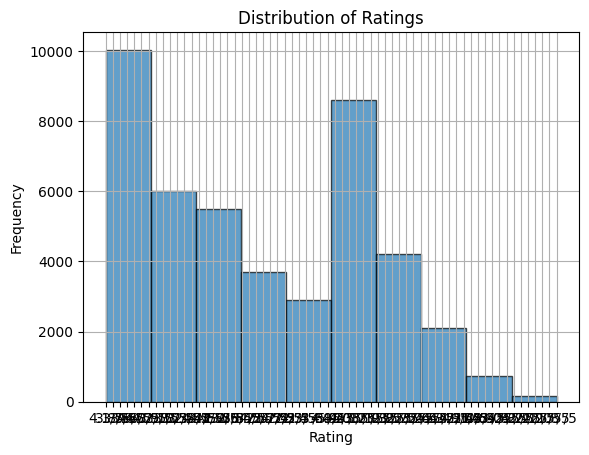

In [88]:
df['rate'].hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 3.Online Order Distribution:

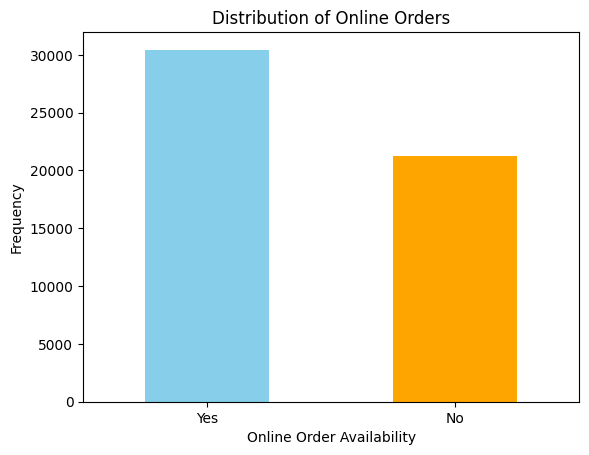

In [89]:
df['online_order'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order Availability')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

## 4.Restaurants Delivering Online or Not:

Visualize the distribution of restaurants based on whether they offer online delivery.

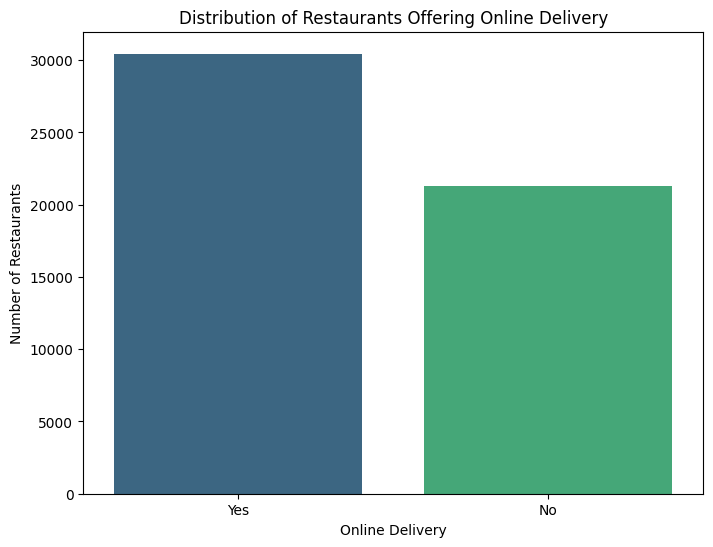

In [90]:

plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Online Delivery')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants Offering Online Delivery')

# Show the plot
plt.show()

## 6. Restaurants Allowing Table Booking or Not:

Create a bar chart to show the proportion of restaurants allowing table booking.

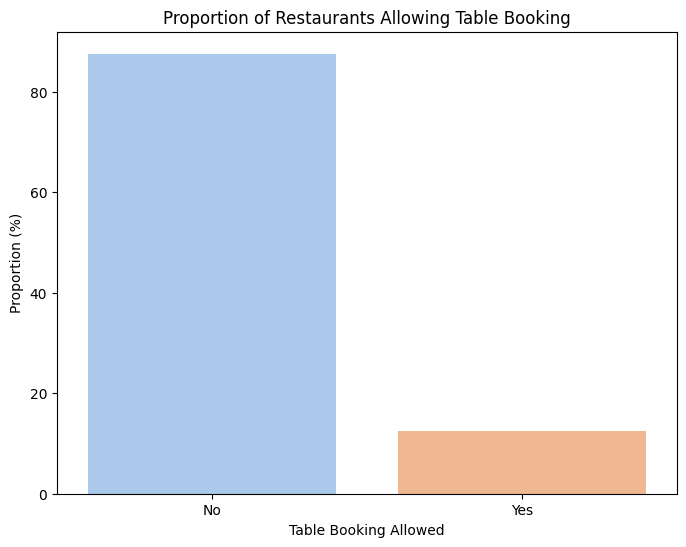

In [91]:
booking_proportion = df['book_table'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=booking_proportion.index, y=booking_proportion.values, palette='pastel')
plt.xlabel('Table Booking Allowed')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Restaurants Allowing Table Booking')
plt.show()

## 7.Restaurant Type:

Visualize the distribution of restaurant types (e.g., cafes, fine dining) in a pie chart or bar charons.s.

## Using Pie chart

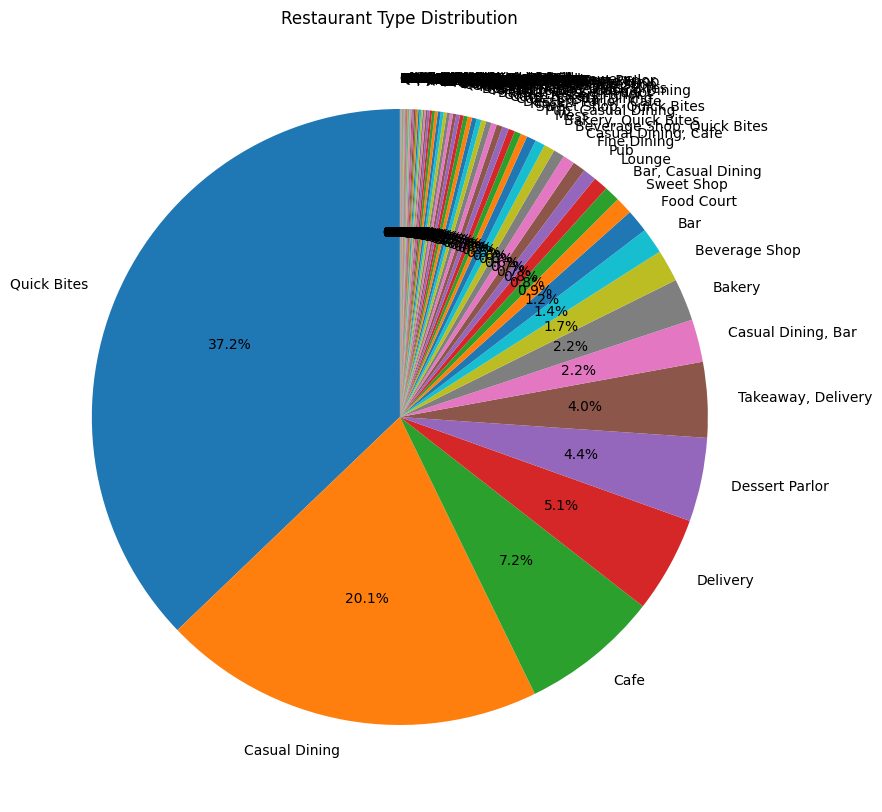

In [92]:
# Calculate the distribution of restaurant types
restaurant_type_distribution = df['rest_type'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(restaurant_type_distribution, labels=restaurant_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Restaurant Type Distribution')
plt.show()


## Using bar chart

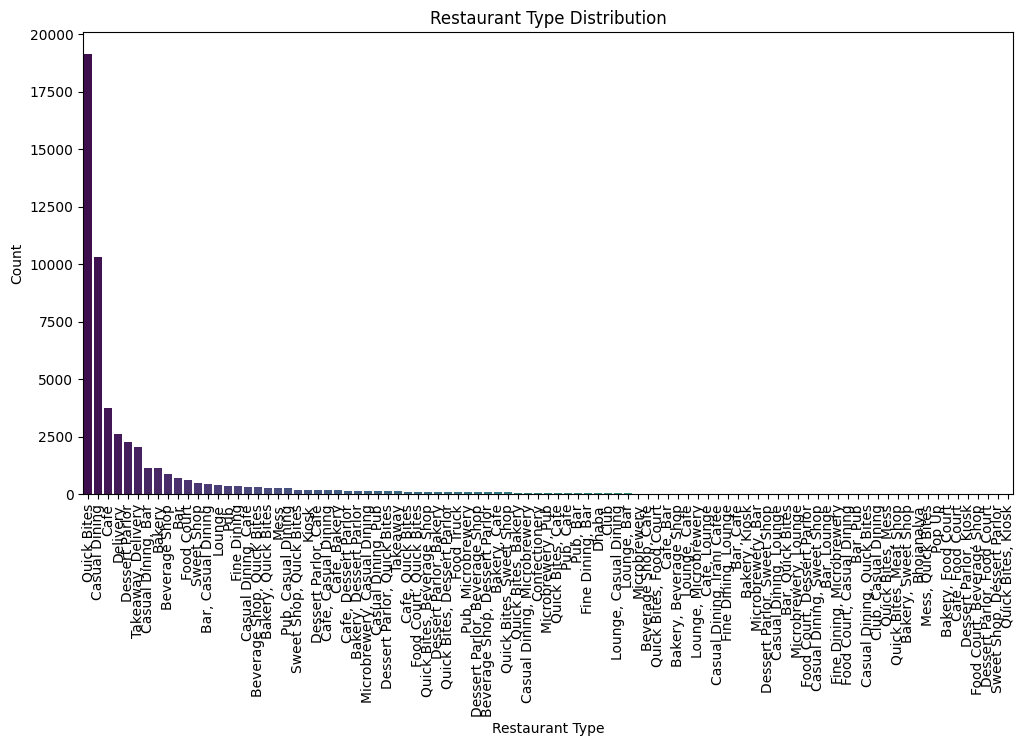

In [93]:
restaurant_type_distribution = df['rest_type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=restaurant_type_distribution.index, y=restaurant_type_distribution.values, palette='viridis')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Restaurant Type Distribution')
plt.xticks(rotation=90)
plt.show()


## 8.Types of Services:

Use a bar chart or pie chart to illustrate the types of services offered by restaurants (online delivery, table booking).

## Using Bar Chart

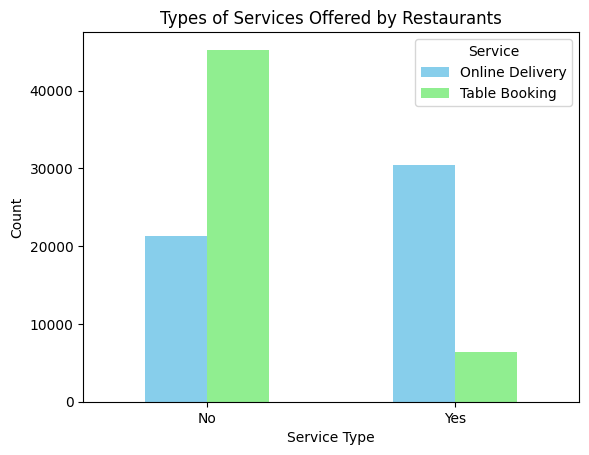

In [94]:
# Count the types of services
service_counts = df[['online_order', 'book_table']].apply(pd.Series.value_counts)
service_counts.plot(kind='bar', rot=0, color=['skyblue', 'lightgreen'])
plt.title('Types of Services Offered by Restaurants')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.legend(title='Service', labels=['Online Delivery', 'Table Booking'])
plt.show()

## Using Pie Chart

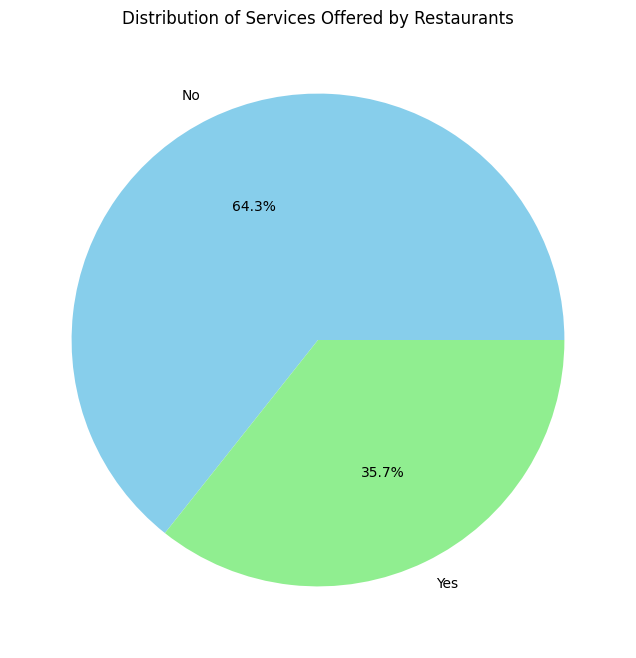

In [95]:
plt.figure(figsize=(8, 8))
plt.pie(service_counts.sum(axis=1), labels=service_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Services Offered by Restaurants')
plt.show()

## 9. Cost of Restaurant:

Visualize the distribution of the approximate cost for two people using a histogram.t.

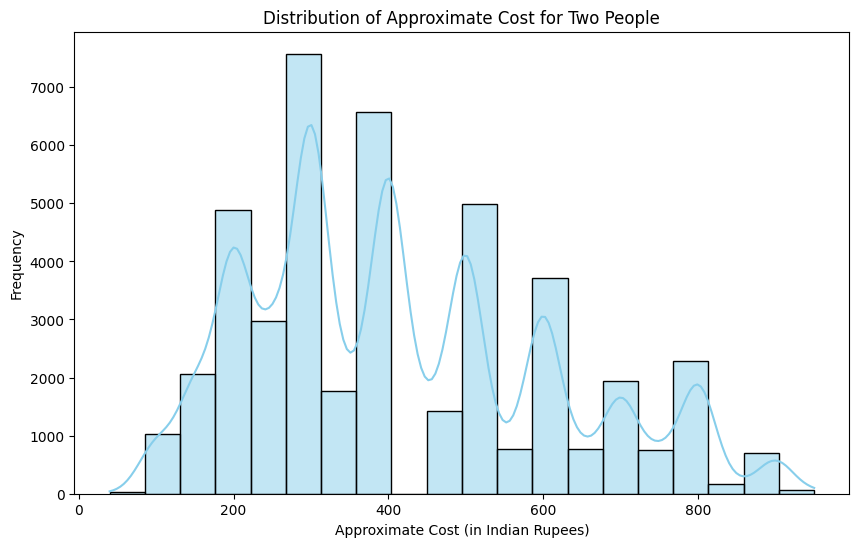

In [96]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace('[^\d.]', ''), errors='coerce')

# Plot a histogra
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost (in Indian Rupees)')
plt.ylabel('Frequency')
plt.show()

## 10. Number of Restaurants in a Location:

Create a bar chart or map to display the count of restaurants in each location.

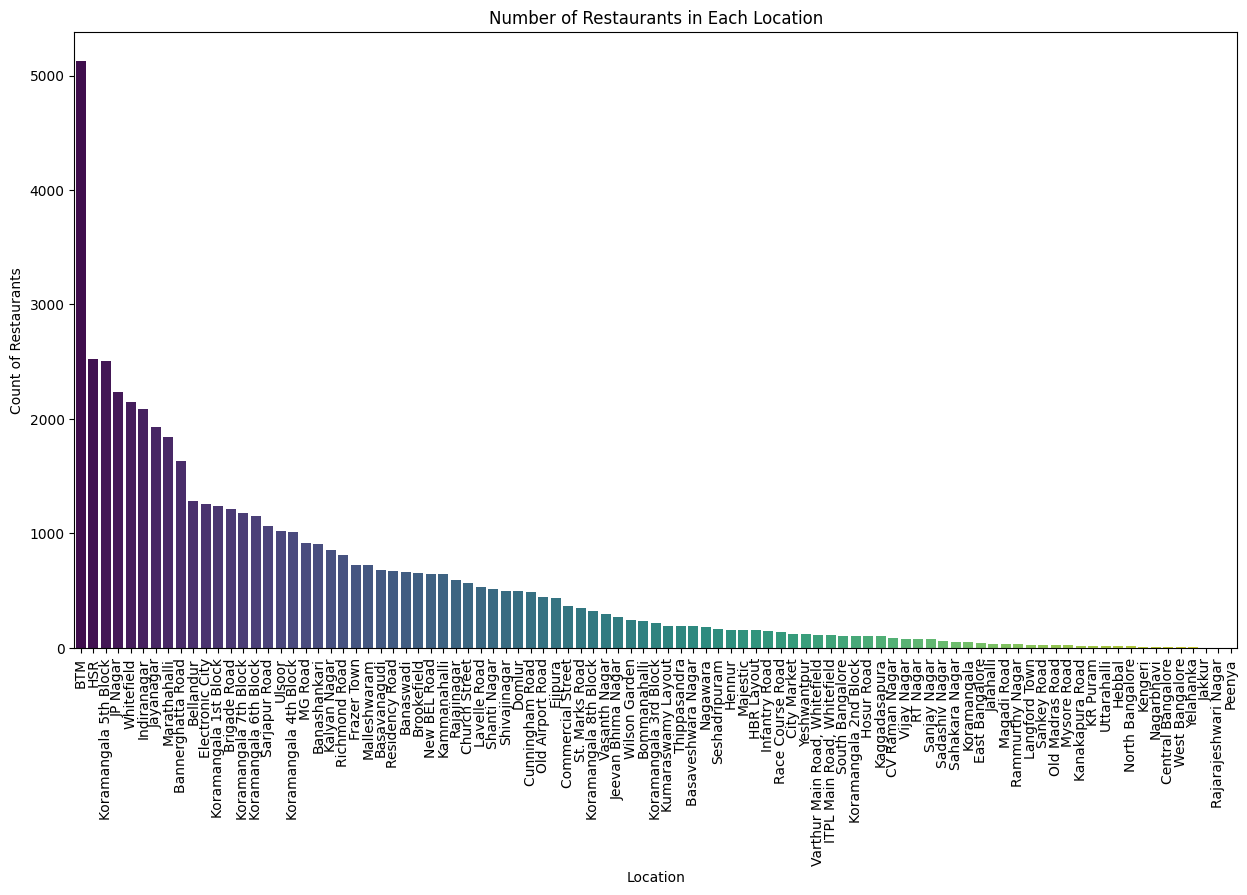

In [97]:
plt.figure(figsize=(15, 8))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index, palette='viridis')
plt.title('Number of Restaurants in Each Location')
plt.xlabel('Location')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [98]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [99]:
df=df.drop(['url','phone'],axis=1)

In [100]:
df.duplicated().sum()

43

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.duplicated().sum()


0

In [103]:
df.dropna(how='any',inplace=True)

In [104]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [105]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [106]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [107]:
df['cost'].unique()

array([800., 300., 600., 700., 550., 500., 450., 650., 400., 750., 200.,
       850., 150., 350., 250., 100., 900., 950., 230., 180., 330.,  40.,
       120.])

In [108]:
print(df['cost'].unique())

print('---'*10)

df.dtypes

[800. 300. 600. 700. 550. 500. 450. 650. 400. 750. 200. 850. 150. 350.
 250. 100. 900. 950. 230. 180. 330.  40. 120.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [109]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '2.1/5', '4.9/5', '3.4 /5', '3.6 /5', '3.3 /5', '4.6 /5',
       '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5', '3.1 /5',
       '2.3 /5', '2.4 /5', '4.7 /5', '4.8 /5', '2.1 /5', '2.0 /5',
       '2.2 /5'], dtype=object)

In [110]:
df = df.loc[df.rate !='NEW']

In [111]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '2.1/5', '4.9/5', '3.4 /5', '3.6 /5', '3.3 /5', '4.6 /5', '4.9 /5',
       '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5', '3.1 /5', '2.3 /5',
       '2.4 /5', '4.7 /5', '4.8 /5', '2.1 /5', '2.0 /5', '2.2 /5'],
      dtype=object)

In [112]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

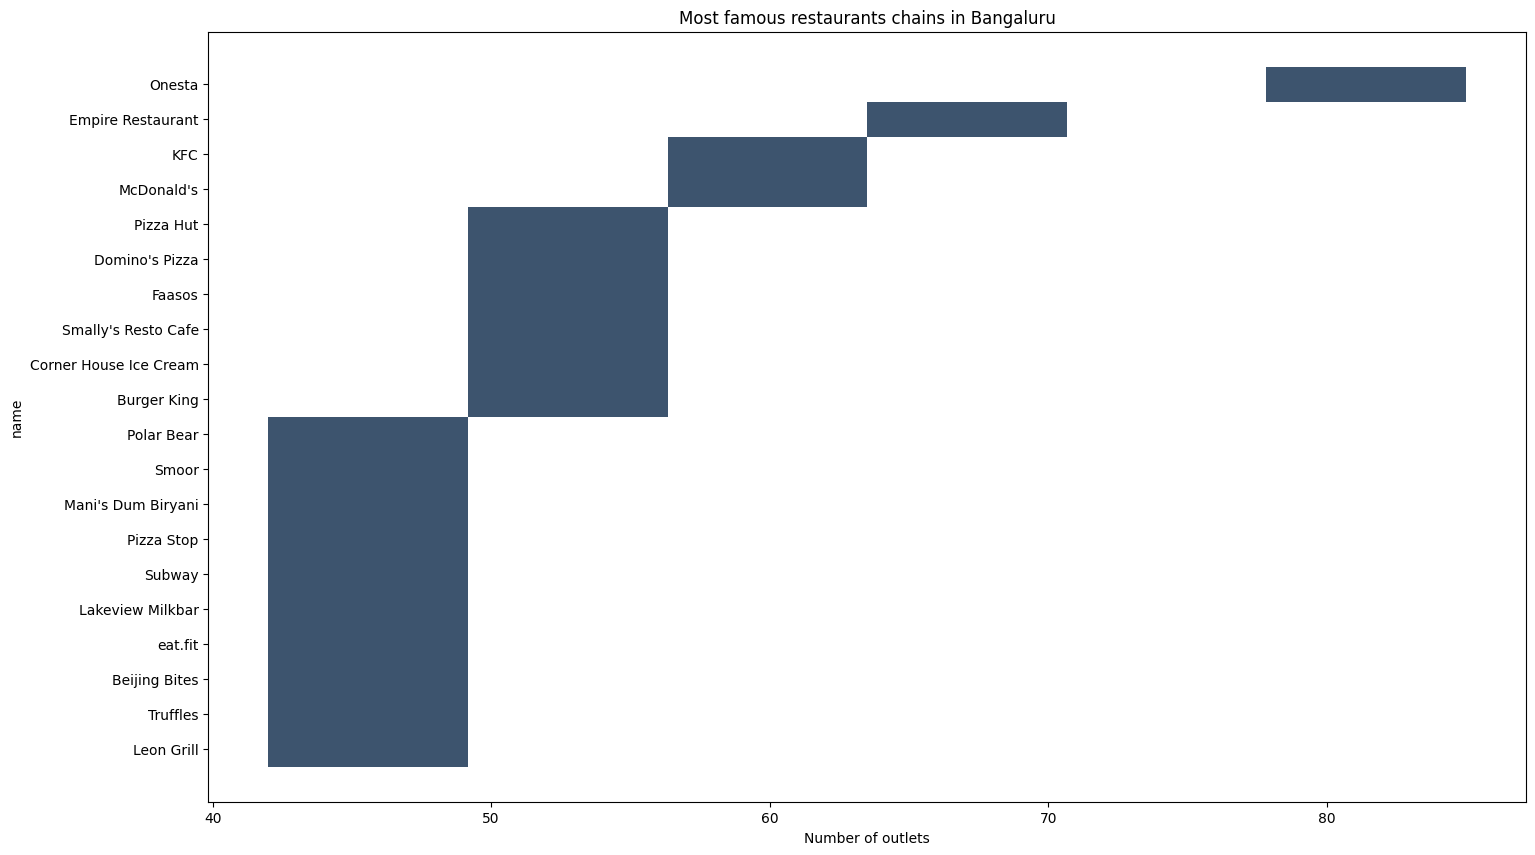

In [113]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.histplot(x=chains,y=chains.index,palette='hls')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

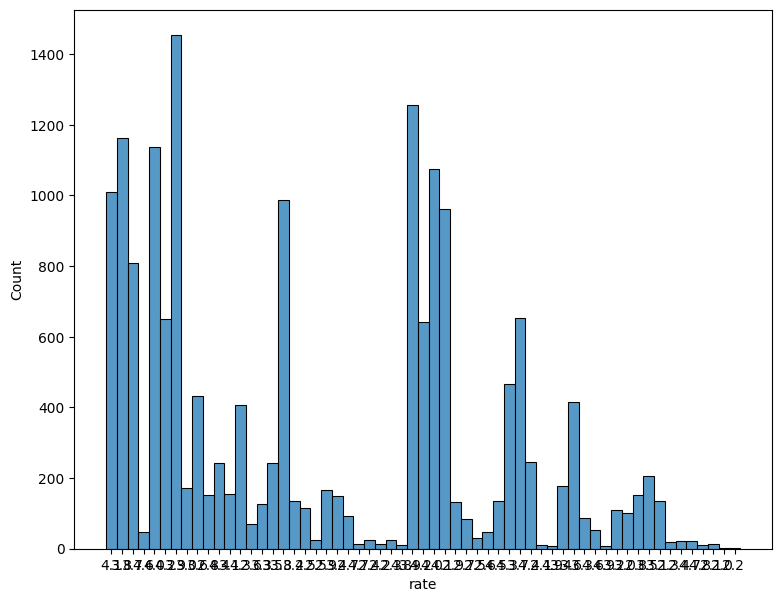

In [114]:
plt.figure(figsize=(9,7))
sns.histplot(df['rate'],bins=20)
plt.show()

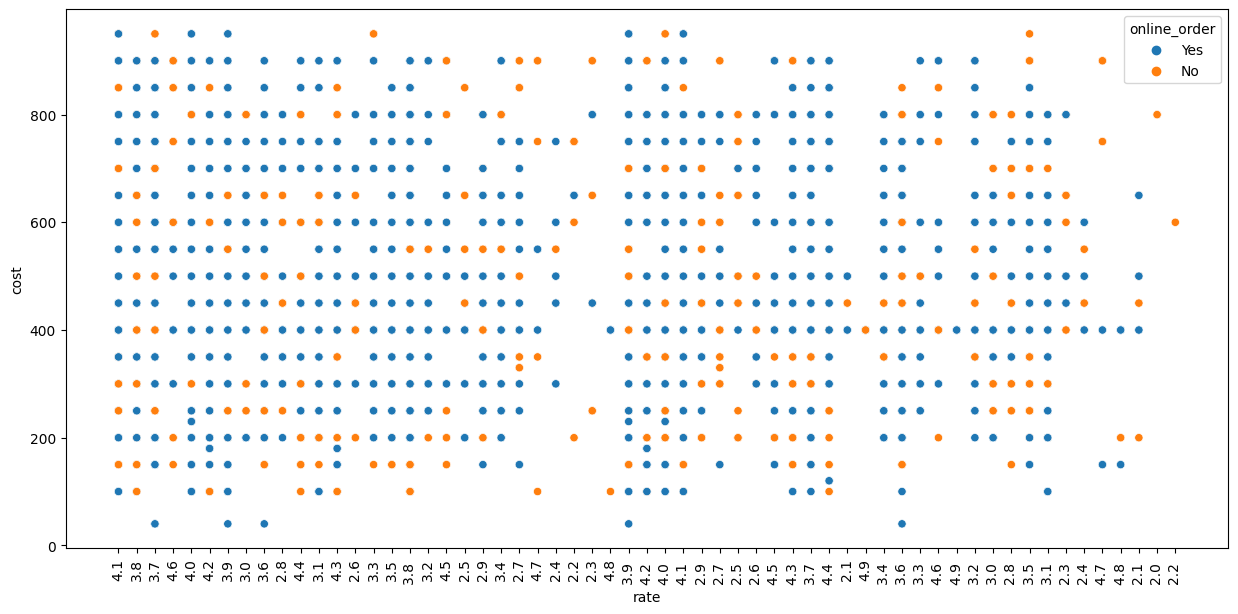

In [115]:
# #Distribution of the cost Vs ratings in parallel with online order
plt.figure(figsize=(15,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.xticks(rotation = 90)
plt.show()

In [116]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '2.1', '4.9', '3.4 ',
       '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ', '3.5 ',
       '3.1 ', '2.3 ', '2.4 ', '4.7 ', '4.8 ', '2.1 ', '2.0 ', '2.2 '],
      dtype=object)

In [117]:
df['rate'].min()

'2.0 '

In [118]:
df['rate'].max()

'4.9 '

In [119]:
df['rate']=df['rate'].astype(float)

In [120]:
((df['rate']>=1) & (df['rate']<2)).sum()

0

In [121]:
((df['rate']>=2) & (df['rate']<3)).sum()

1085

In [122]:
((df['rate']>=3) & (df['rate']<4)).sum()

8957

In [123]:
(df['rate']>=4).sum()

7260

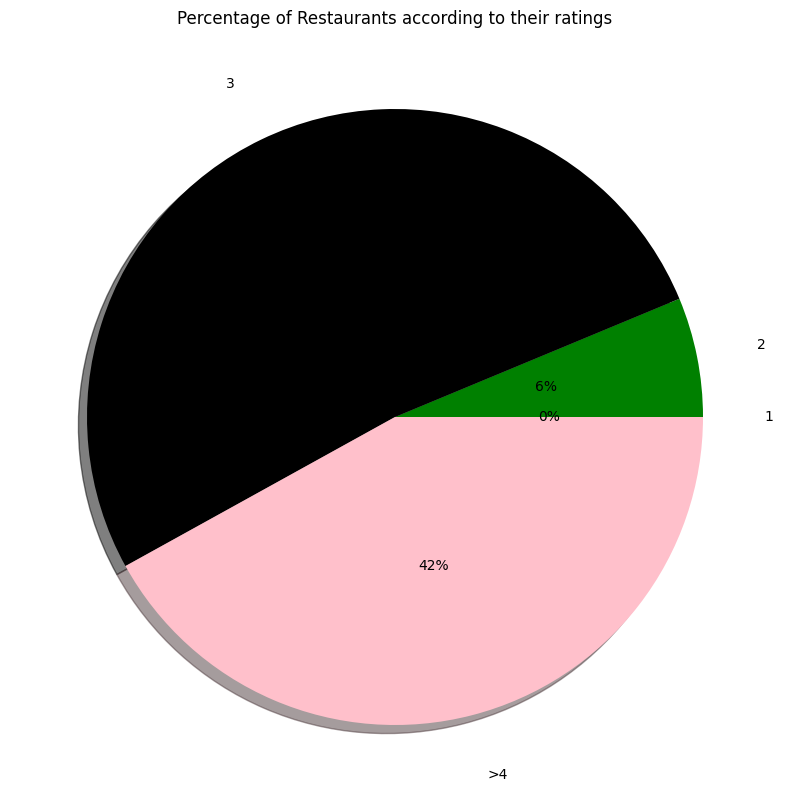

In [124]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]

labels=['1','2','3','>4']
colors = ['red','green','black', 'pink']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

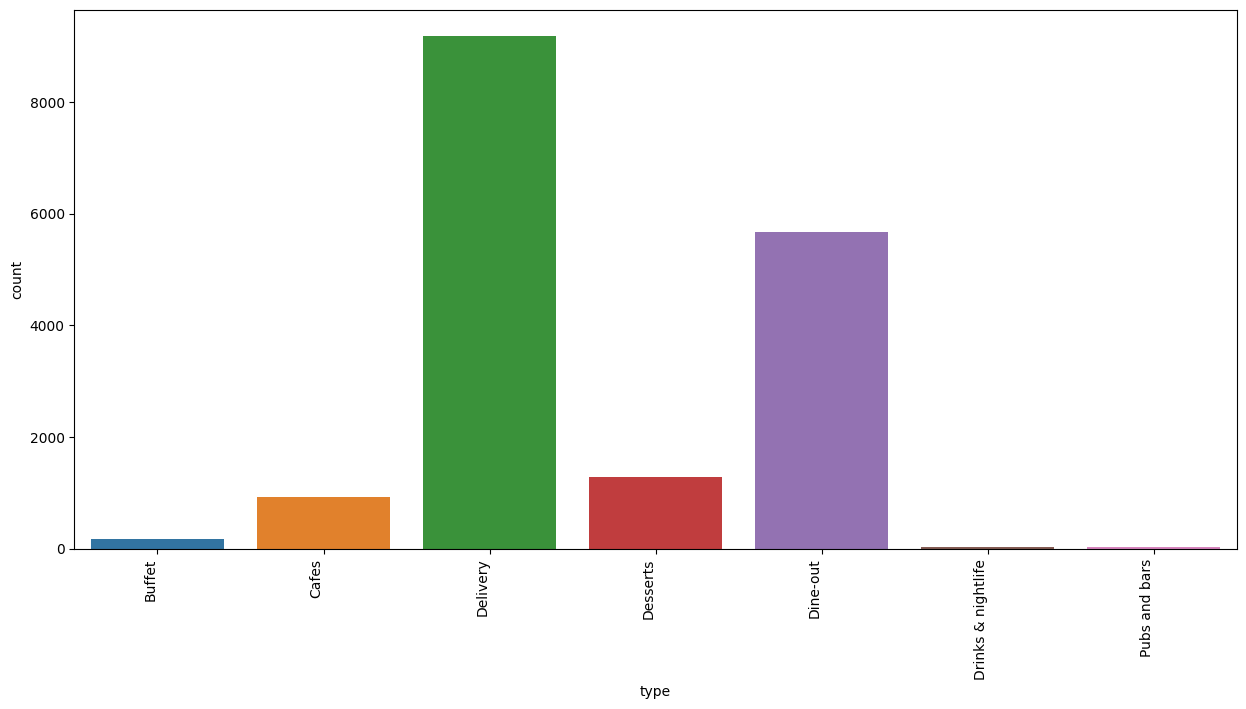

In [125]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='type')
plt.xticks(rotation=90, ha='right')
plt.show()

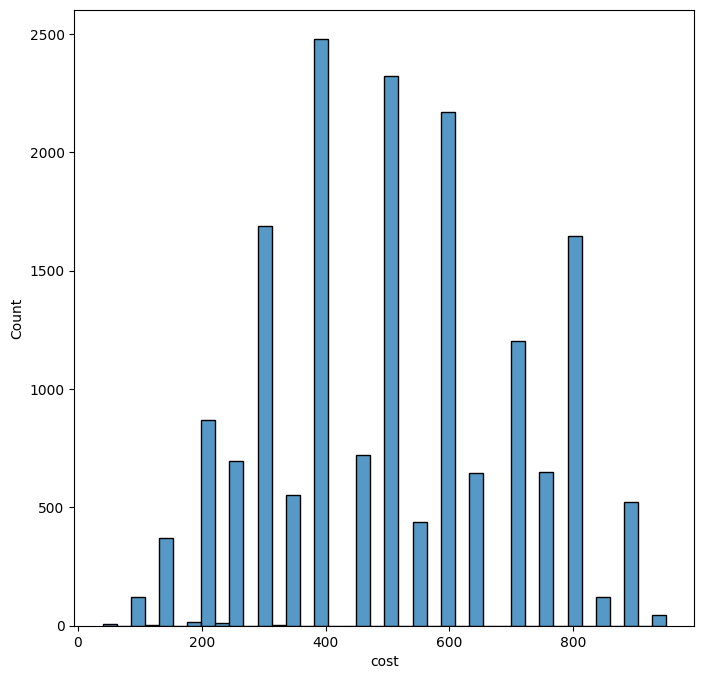

In [126]:
plt.figure(figsize=(8,8))
sns.histplot(df['cost'])
plt.show()

In [127]:
#re=regular expression (use for splitting words)

import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [128]:
df.index=range(df.shape[0])

In [129]:
df.index

RangeIndex(start=0, stop=17302, step=1)

In [130]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta               1710
 Burgers             1142
Burgers              1068
 Sandwiches          1057
 Coffee              1050
 Paratha              947
 Biryani              807
 Chicken Biryani      768
 Pizza                755
Coffee                728
 Tea                  717
 Mutton Biryani       716
 Thali                712
 Fries                703
 Sandwich             699
 Hot Chocolate        649
Biryani               638
 Butter Chicken       602
 Roti                 596
 Noodles              575
 Brownie              549
 Nachos               538
 Chicken Curry        531
 Rolls                501
 Chaat                492
 Tandoori Chicken     490
Pizza                 482
 Fish                 463
 Waffles              459
Rolls                 435
Name: count, dtype: int64

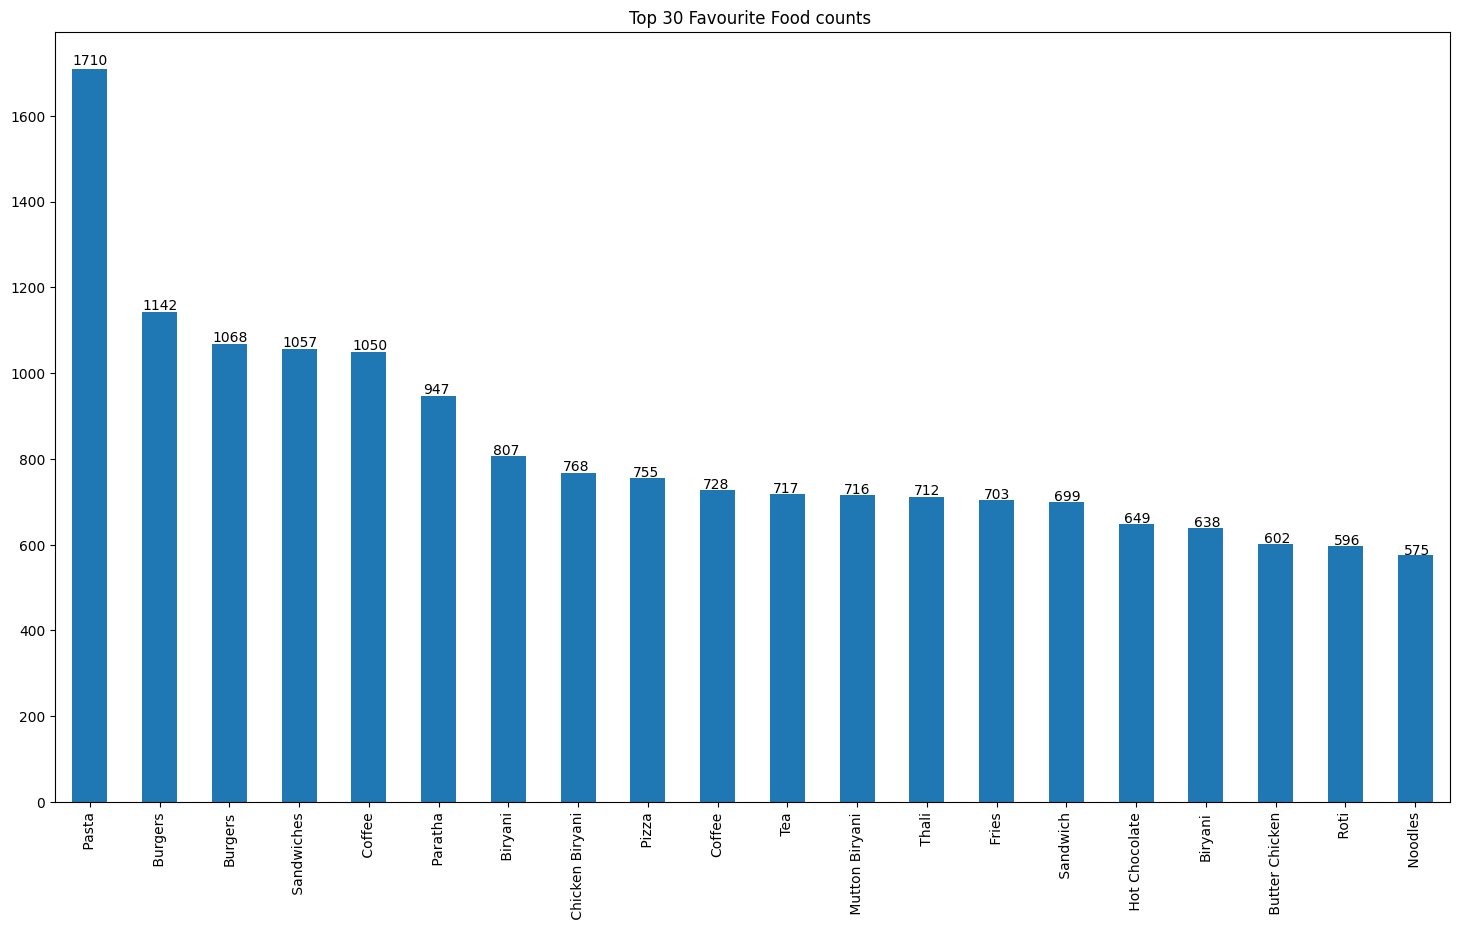

In [131]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

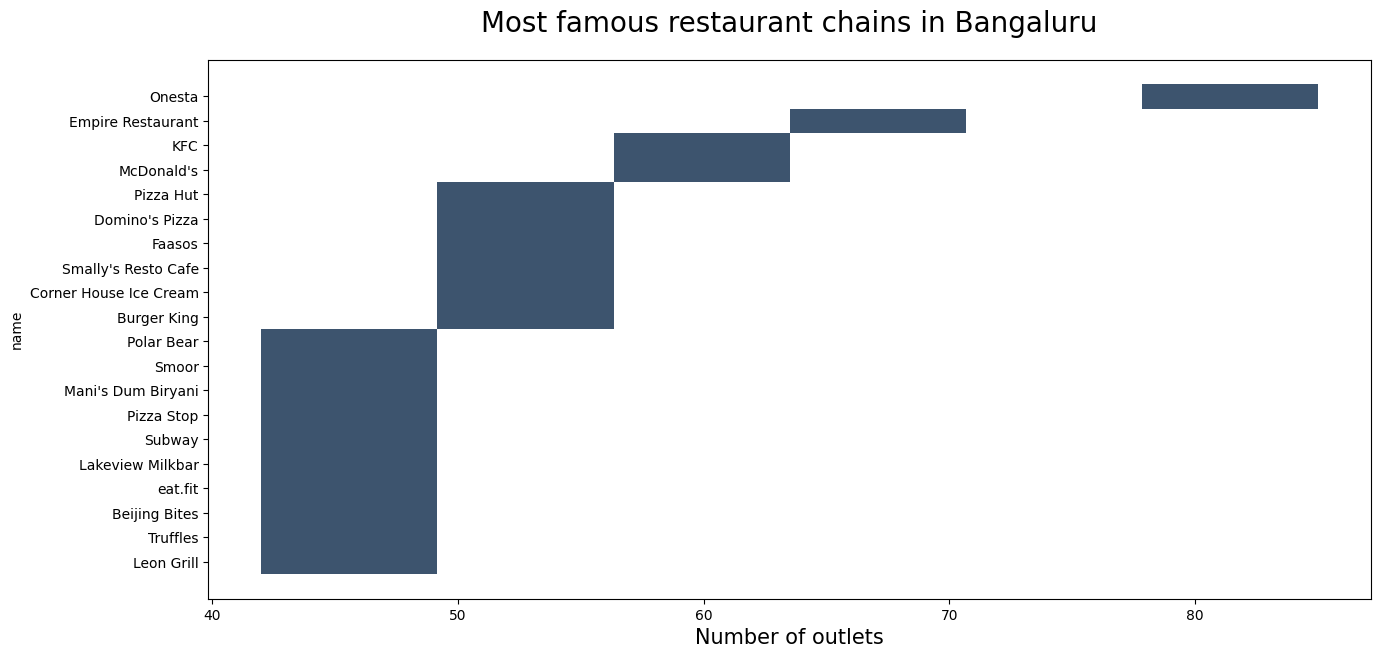

In [132]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.histplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()

In [133]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [134]:
df.online_order.value_counts()

online_order
1    13513
0     3789
Name: count, dtype: int64

In [135]:
df.online_order = pd.to_numeric(df.online_order)

In [136]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [137]:
df.book_table = pd.to_numeric(df.book_table)

In [138]:
df.book_table.value_counts()

book_table
0    15595
1     1707
Name: count, dtype: int64

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [140]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [141]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,16,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",990,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4403,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,16,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",479,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",4403,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,13,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",389,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",4403,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,36,Masala Dosa,1141,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",4403,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,16,"Panipuri, Gol Gappe",1000,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",4403,Buffet,Banashankari


In [142]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv') 

In [143]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,16,990,800.0,4403
1,1,0,787,1,16,479,800.0,4403
2,1,0,918,1,13,389,800.0,4403
3,0,0,88,1,36,1141,300.0,4403
4,0,0,166,4,16,1000,600.0,4403


In [144]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
17297    3.8
17298    3.4
17299    3.6
17300    2.5
17301    2.5
Name: rate, Length: 17302, dtype: float64

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [146]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [147]:
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.12060896703420043

In [148]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9100097069955368

# 📝 Conclusion


1. **url**: The URL of the restaurant, likely pointing to its Zomato page, providing additional information and reviews about the restaurant. This can be used for external references or linking to specific restaurants in analyses.

2. **address**: The physical address of the restaurant in Bangalore. Useful for geographical analysis, understanding restaurant distribution, and locating specific venues.

3. **name**: The name of the restaurant, a crucial identifier in the dataset. Used for restaurant-specific analysis, identifying popular establishments, and general categorization.

4. **online_order**: Indicates whether the restaurant accepts online orders. Valuable for assessing the digital presence of restaurants and understanding consumer preferences.

5. **book_table**: Specifies whether the restaurant allows customers to book tables in advance. Useful for analyzing dining trends, preferences, and the overall restaurant experience.

6. **rate**: Represents the overall rating of the restaurant. Essential for ranking and comparing restaurants based on customer feedback.

7. **votes**: The number of votes contributing to the restaurant's rating. Helpful in understanding the reliability of the rating and the popularity of the restaurant.

8. **phone**: Contact number for the restaurant, enabling communication and possibly further analysis regarding customer interactions or preferences.

9. **location**: Indicates the neighborhood or area in Bangalore where the restaurant is situated. Important for location-based analyses and understanding regional dining preferences.

10. **rest_type**: Describes the type or category of the restaurant, providing insights into the diversity of dining options in Bangalore.

11. **dish_liked**: Specifies dishes that are particularly liked at the restaurant. Valuable for menu analysis and understanding customer preferences.

12. **cuisines**: Lists the cuisines offered by the restaurant. Useful for identifying popular cuisines in Bangalore and analyzing the culinary diversity.

13. **approx_cost(for two people)**: Indicates the approximate cost for two people. Essential for budget analysis and understanding the pricing structure of restaurants.

14. **reviews_list**: Contains reviews for the restaurant. Valuable for sentiment analysis and understanding specific aspects of customer feedback.

15. **menu_item**: Lists specific items on the restaurant's menu. Useful for menu analysis and understanding the variety of offerings.

16. **listed_in(type)**: Specifies the type of listing on Zomato, providing additional categorization for analysis.

17. **listed_in(city)**: Indicates the city listing on Zomato, allowing for filtering and analysis based on different cities.